In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# IMPORT DATA

In [2]:
df=pd.read_csv("weatherHistory1.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Checking if there are some nulls and NaNs

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
df.isnull().sum()   #there are 517 null values which should be replaced

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Preprocessing

In [6]:
#checking the most often item
df["Precip Type"].mode()[0]

'rain'

In [7]:
#replacing null values by most often item "rain"

In [8]:
df["Precip Type"] = df["Precip Type"].fillna(df["Precip Type"].mode()[0])

In [9]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [10]:
#formating column to date format
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], format = "%Y-%m-%d %H:%M:%S.%f %z") 

In [11]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [12]:
{column: len(df[column].unique()) for column in df.columns} #check unigue values in columns

{'Formatted Date': 96429,
 'Summary': 27,
 'Precip Type': 2,
 'Temperature (C)': 7574,
 'Apparent Temperature (C)': 8984,
 'Humidity': 90,
 'Wind Speed (km/h)': 2484,
 'Wind Bearing (degrees)': 360,
 'Visibility (km)': 949,
 'Loud Cover': 1,
 'Pressure (millibars)': 4979,
 'Daily Summary': 214}

In [13]:
#"loud cover" has only one unique value # to drop
df = df.drop(["Loud Cover","Daily Summary"], axis=1)

In [14]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [16]:
#checking correlations
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


In [17]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15 , 15 ) )

    cmap = sns.diverging_palette( 255, 20  , as_cmap = True )

    s =sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize': 12 }

 )
  

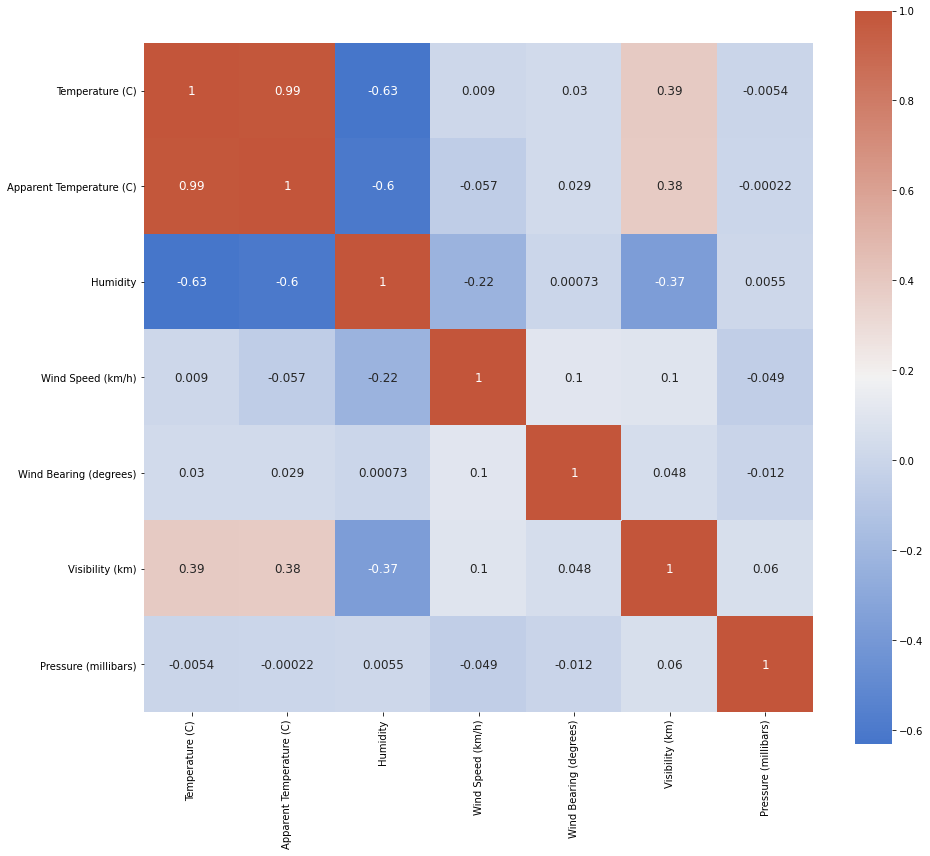

In [19]:
plot_correlation_map(df)

In [20]:
#to remove "apparent temperature" as it is highly correlated to temperature
df = df.drop(["Apparent Temperature (C)"], axis=1)

In [21]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [23]:
{column: len(df) for column in df.columns}

{'Formatted Date': 96453,
 'Summary': 96453,
 'Precip Type': 96453,
 'Temperature (C)': 96453,
 'Humidity': 96453,
 'Wind Speed (km/h)': 96453,
 'Wind Bearing (degrees)': 96453,
 'Visibility (km)': 96453,
 'Pressure (millibars)': 96453}

In [25]:
len((df.columns))

9

In [26]:
{column: len(df[column].unique()) for column in df.columns}

{'Formatted Date': 96429,
 'Summary': 27,
 'Precip Type': 2,
 'Temperature (C)': 7574,
 'Humidity': 90,
 'Wind Speed (km/h)': 2484,
 'Wind Bearing (degrees)': 360,
 'Visibility (km)': 949,
 'Pressure (millibars)': 4979}

In [27]:
df["year"] = df["Formatted Date"].apply(lambda x: x.year)
df["month"] = df["Formatted Date"].apply(lambda x: x.month)
df["day"] = df["Formatted Date"].apply(lambda x: x.day)


In [28]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Formatted Date          96453 non-null  object 
 1   Summary                 96453 non-null  object 
 2   Precip Type             96453 non-null  object 
 3   Temperature (C)         96453 non-null  float64
 4   Humidity                96453 non-null  float64
 5   Wind Speed (km/h)       96453 non-null  float64
 6   Wind Bearing (degrees)  96453 non-null  float64
 7   Visibility (km)         96453 non-null  float64
 8   Pressure (millibars)    96453 non-null  float64
 9   year                    96453 non-null  int64  
 10  month                   96453 non-null  int64  
 11  day                     96453 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 8.8+ MB


In [31]:
df = df.drop(["Formatted Date"], axis=1)

In [32]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1
...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9


# Label encoding

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [35]:
le.fit(df["Summary"])

LabelEncoder()

In [36]:
list(le.classes_)

['Breezy',
 'Breezy and Dry',
 'Breezy and Foggy',
 'Breezy and Mostly Cloudy',
 'Breezy and Overcast',
 'Breezy and Partly Cloudy',
 'Clear',
 'Dangerously Windy and Partly Cloudy',
 'Drizzle',
 'Dry',
 'Dry and Mostly Cloudy',
 'Dry and Partly Cloudy',
 'Foggy',
 'Humid and Mostly Cloudy',
 'Humid and Overcast',
 'Humid and Partly Cloudy',
 'Light Rain',
 'Mostly Cloudy',
 'Overcast',
 'Partly Cloudy',
 'Rain',
 'Windy',
 'Windy and Dry',
 'Windy and Foggy',
 'Windy and Mostly Cloudy',
 'Windy and Overcast',
 'Windy and Partly Cloudy']

In [37]:
df["Summary"] = le.transform(df["Summary"])

In [38]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day
0,19,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1
1,19,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1
2,17,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1
3,19,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1
4,17,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1
...,...,...,...,...,...,...,...,...,...,...,...
96448,19,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9
96449,19,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9
96450,19,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9
96451,19,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9


In [39]:
le.fit(df["Precip Type"])

LabelEncoder()

In [40]:
df["Precip Type"] = le.transform(df["Precip Type"])

In [42]:
df.info()  #all columns are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 96453 non-null  int32  
 1   Precip Type             96453 non-null  int32  
 2   Temperature (C)         96453 non-null  float64
 3   Humidity                96453 non-null  float64
 4   Wind Speed (km/h)       96453 non-null  float64
 5   Wind Bearing (degrees)  96453 non-null  float64
 6   Visibility (km)         96453 non-null  float64
 7   Pressure (millibars)    96453 non-null  float64
 8   year                    96453 non-null  int64  
 9   month                   96453 non-null  int64  
 10  day                     96453 non-null  int64  
dtypes: float64(6), int32(2), int64(3)
memory usage: 7.4 MB


D:\Programmes\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature (C)', ylabel='Density'>

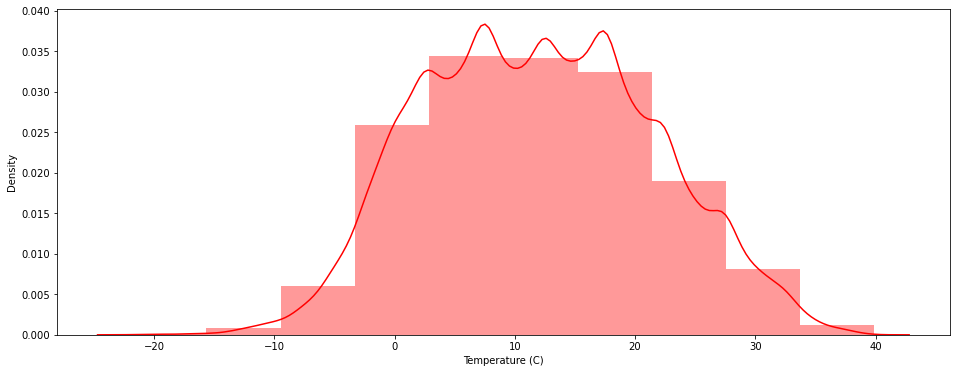

In [43]:
plt.figure(figsize=(16, 6))
sns.distplot(df['Temperature (C)'],bins=10,hist=True,kde=True,color='r')

D:\Programmes\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

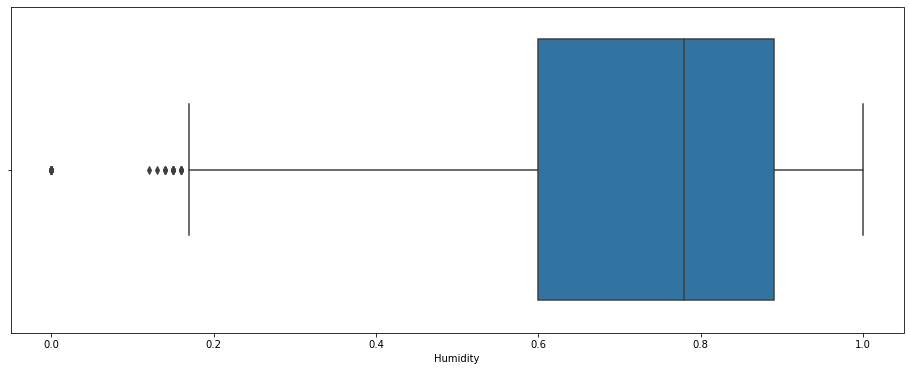

In [44]:
plt.figure(figsize=(16, 6))
sns.boxplot(df['Humidity'])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

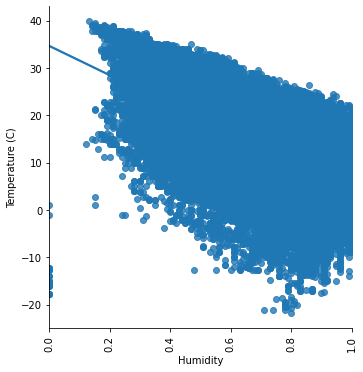

In [47]:
sns.lmplot(y='Temperature (C)',x='Humidity',data=df)
plt.xticks(rotation=90)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

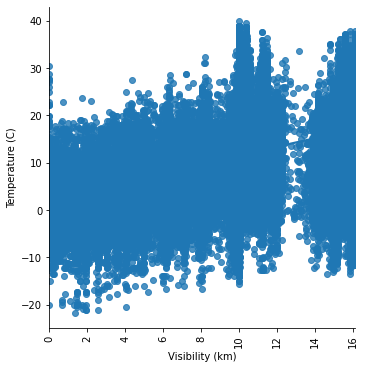

In [48]:
sns.lmplot(y='Temperature (C)',x='Visibility (km)',data=df)
plt.xticks(rotation=90)

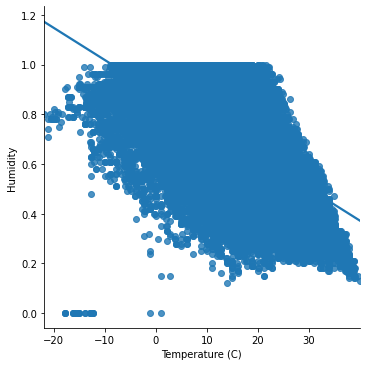

In [49]:
sns.lmplot(y='Humidity',x='Temperature (C)',data=df)

# LineareRegression()

In [50]:
import numpy as np
x=df['Humidity'].values[:,np.newaxis]

In [51]:
y=df["Temperature (C)"].values

In [52]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=42)

In [53]:
model = LinearRegression() 
model.fit(x_train,y_train) 
predicted = model.predict(x_test)

In [54]:
print("MSE :" ,metrics.mean_squared_error(y_test,predicted))
print("R Squared : " ,metrics.r2_score(y_test,predicted))

MSE : 55.68387891640231
R Squared :  0.39578649233601326


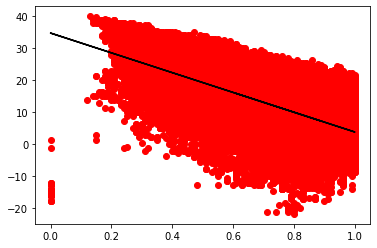

In [55]:
plt.scatter(x,y,color='r')
plt.plot(x,model.predict(x),color='k')
plt.show()

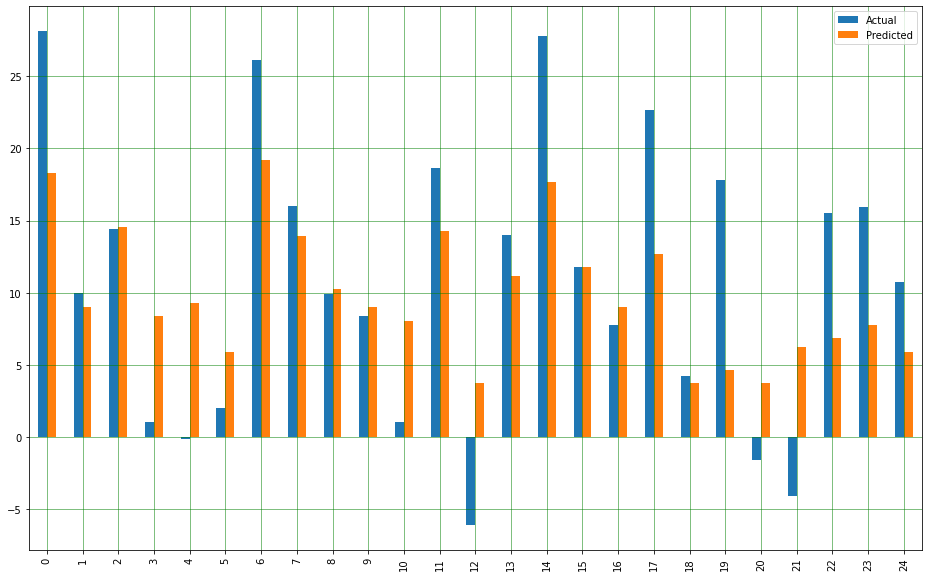

In [56]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})
df1
df11 = df1.head(25)
df11.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# multiLinearRegression

In [57]:
x1=df[['Summary','Precip Type','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']].values

In [59]:
y1=df['Temperature (C)'].values

In [60]:
x1_train,x1_test,y1_train,y1_test =train_test_split(x1,y1,test_size=0.10,random_state=30)

In [61]:
model1 = LinearRegression() 
model1.fit(x1_train,y1_train) 
predicted1 = model1.predict(x1_test)

In [62]:
df2 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': predicted1.flatten()})
df2

,Actual,Predicted
0,1.050000,9.239387
1,12.566667,16.290247
2,9.305556,15.001370
3,22.344444,15.480808
4,-2.894444,-0.594705
...,...,...
9641,8.300000,10.781611
9642,14.505556,11.319687
9643,26.983333,19.557047
9644,22.800000,14.980135


In [63]:
print("MSE :" ,metrics.mean_squared_error(y1_test,predicted1))
print("R Squared : " ,metrics.r2_score(y1_test,predicted1))

MSE : 35.368894947957315
R Squared :  0.6132573740798682


# polynomialRegression

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x3=df[['Summary','Precip Type','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']] 
y3=df['Temperature (C)'].values
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x3_train,x3_test,y3_train,y3_test =train_test_split(x3,y3,test_size=0.20,random_state=30)

x_train_fit=poly.fit_transform(x3_train)
lg.fit(x_train_fit,y3_train)

LinearRegression()

In [66]:
x_test_=poly.fit_transform(x3_test)
predicted5=lg.predict(x_test_)

print("MSE:",metrics.mean_squared_error(y3_test,predicted5))
print("R squared ",metrics.r2_score(y3_test,predicted5))

MSE: 29.293106364384716
R squared  0.6784675216019919


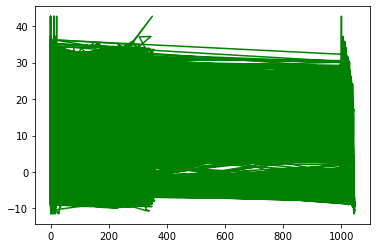

In [67]:
plt.plot(x3,lg.predict(poly.fit_transform(x3)),color='green')

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x3=df[['Humidity']] 
y3=df['Temperature (C)'].values
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x3_train,x3_test,y3_train,y3_test =train_test_split(x3,y3,test_size=0.1,random_state=30)

x_train_fit=poly.fit_transform(x3_train)
lg.fit(x_train_fit,y3_train)

x_test_=poly.fit_transform(x3_test)
predicted5=lg.predict(x_test_)

print("MSE:",metrics.mean_squared_error(y3_test,predicted5))
print("R squared ",metrics.r2_score(y3_test,predicted5))

MSE: 53.90007323560017
R squared  0.41062744846577903


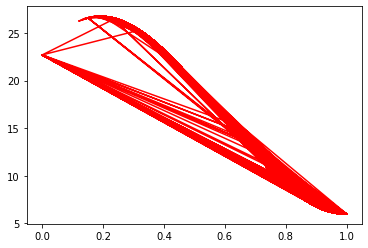

In [70]:
plt.plot(x3,lg.predict(poly.fit_transform(x3)),color='r')

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x3=df[['Visibility (km)']] 
y3=df['Temperature (C)'].values
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x3_train,x3_test,y3_train,y3_test =train_test_split(x3,y3,test_size=0.1,random_state=30)

x_train_fit=poly.fit_transform(x3_train)
lg.fit(x_train_fit,y3_train)

x_test_=poly.fit_transform(x3_test)
predicted5=lg.predict(x_test_)

print("MSE:",metrics.mean_squared_error(y3_test,predicted5))
print("R squared ",metrics.r2_score(y3_test,predicted5))

MSE: 71.40231911391827
R squared  0.2192484262927532


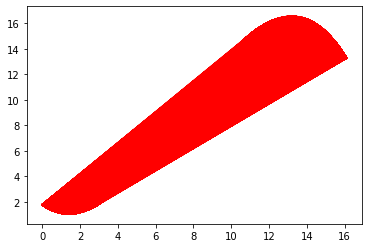

In [72]:
plt.plot(x3,lg.predict(poly.fit_transform(x3)),color='r')

# XGBOOST

In [73]:
import xgboost as xgb
import lightgbm as lgb
reg_xgb = xgb.XGBRegressor(max_death=3,learning_rate=0.08,n_estimators=700, random_state=40)
reg_xgb.fit(x1_train, y1_train)
predict_xgb=reg_xgb.predict(x1_test)
print("MSE:",metrics.mean_squared_error(y1_test,predict_xgb))
print("R squared ",metrics.r2_score(y1_test,predict_xgb))

ModuleNotFoundError: No module named 'xgboost'